# Model Run PCR-GLOBWB Great Salt Lake using eWaterCycle

### contact: j.p.m.aerts@tudelft.nl

In [1]:
import ewatercycle.forcing
import ewatercycle.models
import ewatercycle.parameter_sets

from pathlib import Path

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

/gpfs/home6/jaerts/mambaforge/envs/wflow_state_flux/lib/python3.10/site-packages/esmvalcore/experimental/_warnings.py:13: UserWarning: 
  Thank you for trying out the new ESMValCore API.
  Note that this API is experimental and may be subject to change.
  More info: https://github.com/ESMValGroup/ESMValCore/issues/498


loggggg


## Set Paths

In [2]:
ROOT = Path('/home/jaerts/banafsheh/salt_lake_pcr-globwb/')
MODELDATA = Path('/gpfs/work1/0/wtrcycle/users/jaerts/pcrglobwb2_input/')

## Set Config

In [3]:
ewatercycle.CFG.load_from_file(f'{ROOT}/ewatercycle_salt_lake.yml')

# Load Parameter Set

In [4]:
salt_lake = ewatercycle.parameter_sets.ParameterSet(
    name="pcr-globwb_salt_lake",
    directory=f"{MODELDATA}/",
    config=f"{ROOT}/salt_lake_05min.ini",
    target_model="pcrglobwb",
    supported_model_versions={"setters"},
)

# Load Forcing Data

In [5]:
forcing = ewatercycle.forcing.load_foreign(
    target_model="pcrglobwb",
    start_time="2001-01-01T00:00:00Z",
    end_time="2017-12-31T00:00:00Z",
    directory=f"{ROOT}/",
    shape=None,  # if available, it can be used e.g. for plotting
    forcing_info=dict(
        # model-specific options
        precipitationNC="pcrglobwb_OBS6_ERA5_reanaly_1_day_pr_2002-2017_salt_lake.nc",
        temperatureNC="pcrglobwb_OBS6_ERA5_reanaly_1_day_tas_2002-2017_salt_lake.nc",
    ),
)
print(forcing)


Forcing data for PCRGlobWB
--------------------------
Directory: /gpfs/work1/0/wtrcycle/users/jaerts/banafsheh/salt_lake_pcr-globwb
Start time: 2001-01-01T00:00:00Z
End time: 2017-12-31T00:00:00Z
Shapefile: None
Additional information for model config:
  - temperatureNC: pcrglobwb_OBS6_ERA5_reanaly_1_day_tas_2002-2017_salt_lake.nc
  - precipitationNC: pcrglobwb_OBS6_ERA5_reanaly_1_day_pr_2002-2017_salt_lake.nc


# Model Setup

In [6]:
pcrglob = ewatercycle.models.PCRGlobWB(
    version="setters", parameter_set=salt_lake, forcing=forcing
)
print(pcrglob)

eWaterCycle PCRGlobWB
-------------------
Version = setters
Parameter set = 
  Parameter set
  -------------
  name=pcr-globwb_salt_lake
  directory=/gpfs/work1/0/wtrcycle/users/jaerts/pcrglobwb2_input
  config=/gpfs/work1/0/wtrcycle/users/jaerts/banafsheh/salt_lake_pcr-globwb/salt_lake_05min.ini
  doi=N/A
  target_model=pcrglobwb
  supported_model_versions={'setters'}
Forcing = 
  Forcing data for PCRGlobWB
  --------------------------
  Directory: /gpfs/work1/0/wtrcycle/users/jaerts/banafsheh/salt_lake_pcr-globwb
  Start time: 2001-01-01T00:00:00Z
  End time: 2017-12-31T00:00:00Z
  Shapefile: None
  Additional information for model config:
    - temperatureNC: pcrglobwb_OBS6_ERA5_reanaly_1_day_tas_2002-2017_salt_lake.nc
    - precipitationNC: pcrglobwb_OBS6_ERA5_reanaly_1_day_pr_2002-2017_salt_lake.nc


In [7]:
cfg_file, cfg_dir = pcrglob.setup(
    max_spinups_in_years=30,
    start_time='2002-01-01T00:00:00Z',
    end_time='2017-12-31T00:00:00Z'
)
cfg_file, cfg_dir

('/gpfs/work1/0/wtrcycle/users/jaerts/banafsheh/salt_lake_pcr-globwb/pcrglobwb_20220830_120659/pcrglobwb_ewatercycle.ini',
 '/gpfs/work1/0/wtrcycle/users/jaerts/banafsheh/salt_lake_pcr-globwb/pcrglobwb_20220830_120659')

In [8]:
pcrglob.parameters

[('start_time', '2002-01-01T00:00:00Z'),
 ('end_time', '2017-12-31T00:00:00Z'),
 ('routing_method', 'accuTravelTime'),
 ('max_spinups_in_years', '30')]

In [9]:
pcrglob.initialize(cfg_file)

# Model Run

In [ ]:
while pcrglob.time < pcrglob.end_time:
    print(pcrglob.time_as_isostr, end="\r")
    pcrglob.update()
    
print('Model Run finished!')

In [ ]:
pcrglob.finalize()

In [2]:
import xarray as xr

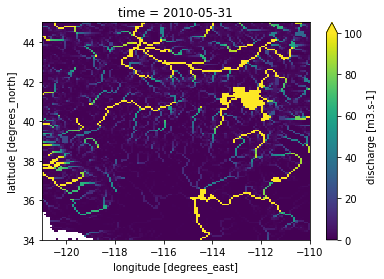

In [8]:
xr.open_dataset("/gpfs/work1/0/wtrcycle/users/jaerts/banafsheh/salt_lake_pcr-globwb/pcrglobwb_20220830_124614/netcdf/discharge_monthAvg_output.nc").discharge.isel(time=100).plot(vmax=100)

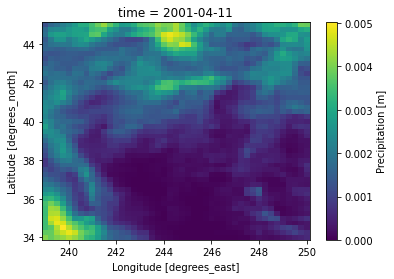

In [12]:
xr.open_dataset("/gpfs/work1/0/wtrcycle/users/jaerts/banafsheh/salt_lake_pcr-globwb/pcrglobwb_OBS6_ERA5_reanaly_1_day_pr_2002-2017_salt_lake.nc").pr.isel(time=100).plot()

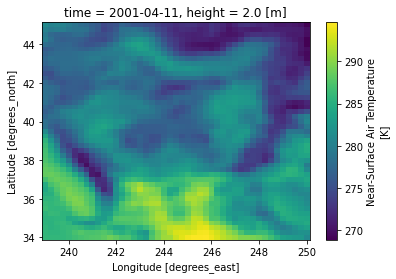

In [14]:
xr.open_dataset("/gpfs/work1/0/wtrcycle/users/jaerts/banafsheh/salt_lake_pcr-globwb/pcrglobwb_OBS6_ERA5_reanaly_1_day_tas_2002-2017_salt_lake.nc").tas.isel(time=100).plot()

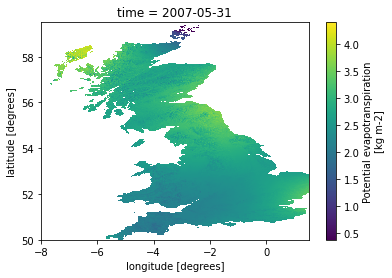

In [19]:
xr.open_dataset("/gpfs/work1/0/wtrcycle/users/jaerts/camels_uk/pcr-globwb/uk/ceh-gear_chess_camels-gb_uk_pet_clim2000-2007_2017.nc").pet.isel(time=150).plot()

In [18]:
ds = xr.open_dataset("/gpfs/work1/0/wtrcycle/users/jaerts/camels_uk/pcr-globwb/uk/ceh-gear_chess_camels-gb_uk_pet_clim2000-2007_2017.nc")